In [73]:
import os.path as osp
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [74]:
# Load
csv_path = osp.join("../output", "minimum_rank_20210623_172751", "results.csv")
df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,num_of_entries,s_net,s_mn,s_gt,effective_rank_net,effective_rank_mn,effective_rank_gt,mse_test_net,mse_test_mn,mse_train_net,mse_train_mn
0,0,2000.000000,[8.94361167e+00 9.13092581e-01 8.86012456e-01 ...,[8.94680301e+00 9.12253759e-01 8.85947247e-01 ...,[1.00028980e+01 9.98816052e-01 9.39613911e-01 ...,3.593919,3.767076,4.419312,1.121534e-06,3.869006e-07,3.020295e-07,1.130557e-23
1,1,2222.222222,[8.83248391e+00 8.96415910e-01 8.69970910e-01 ...,[8.83432960e+00 8.95381633e-01 8.70471960e-01 ...,[1.00028980e+01 9.98816052e-01 9.39613911e-01 ...,3.638685,3.770838,4.419312,4.954844e-07,3.299472e-07,1.262402e-07,5.299837e-24
2,2,2444.444444,[8.72016933e+00 8.91677926e-01 8.49786875e-01 ...,[8.71989743e+00 8.91225183e-01 8.50254115e-01 ...,[1.00028980e+01 9.98816052e-01 9.39613911e-01 ...,3.575000,3.780797,4.419312,8.239590e-07,2.875277e-07,3.572438e-07,8.058980e-24
3,3,2666.666667,[8.54504197e+00 8.63514121e-01 8.09361003e-01 ...,[8.54622524e+00 8.63336046e-01 8.10087389e-01 ...,[1.00028980e+01 9.98816052e-01 9.39613911e-01 ...,3.552249,3.780073,4.419312,7.464428e-07,2.609412e-07,3.908603e-07,4.936151e-24
4,4,2888.888889,[8.42708080e+00 8.54676036e-01 7.89830661e-01 ...,[8.42822202e+00 8.54061852e-01 7.90182696e-01 ...,[1.00028980e+01 9.98816052e-01 9.39613911e-01 ...,3.562234,3.804958,4.419312,7.645805e-07,2.487409e-07,3.877670e-07,4.003839e-23


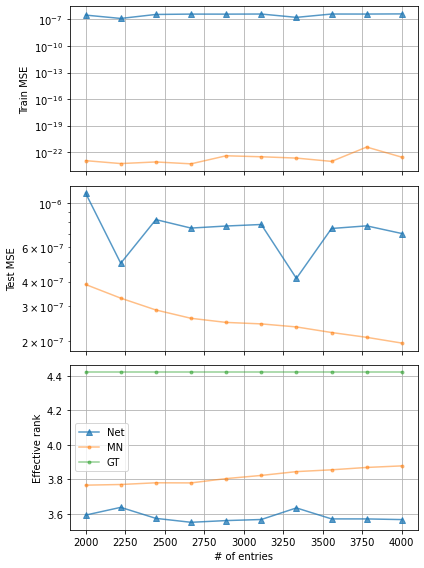

In [79]:
fig, axs = plt.subplots(3, 1, sharex=True,figsize=(6,8))


ax = axs[0]
ax.plot(df["num_of_entries"], df["mse_train_net"], label="Net", alpha=0.75, marker="^")
ax.plot(df["num_of_entries"], df["mse_train_mn"], label="MN", alpha=0.5, marker=".")
ax.grid()
ax.set_ylabel("Train MSE")
ax.set_yscale("log")

ax = axs[1]
ax.plot(df["num_of_entries"], df["mse_test_net"], label="Net", alpha=0.75, marker="^")
ax.plot(df["num_of_entries"], df["mse_test_mn"], label="MN", alpha=0.5, marker=".")
ax.grid()
ax.set_ylabel("Test MSE")
ax.set_yscale("log")


ax = axs[2]
ax.plot(
    df["num_of_entries"], df["effective_rank_net"], label="Net", alpha=0.75, marker="^"
)
ax.plot(
    df["num_of_entries"], df["effective_rank_mn"], label="MN", alpha=0.5, marker="."
)
ax.plot(
    df["num_of_entries"], df["effective_rank_gt"], label="GT", alpha=0.5, marker="."
)
ax.grid()
ax.legend()
ax.set_xlabel("# of entries")
ax.set_ylabel("Effective rank")
plt.tight_layout()
plt.show()

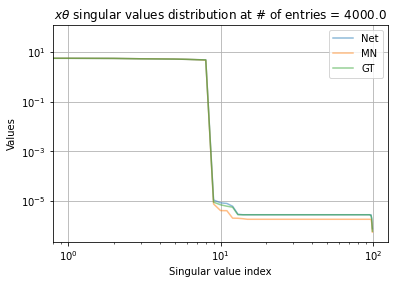

In [76]:
series = df.iloc[-1]
plt.plot(s_net, label="Net", alpha=0.5)
plt.plot(s_mn, label="MN", alpha=0.5)
plt.plot(s_gt, label="GT", alpha=0.5)
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Values")
plt.xlabel("Singular value index")
plt.title(
    r"$x\theta$ singular values distribution at # of entries = {}".format(
        series["num_of_entries"]
    )
)
plt.legend()
plt.show()